# Performing EDA and finding out the key features behind the survival of a person on the Titanic.

## Setting up the relevant tools and the dataset.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("./assets/Titanic-Dataset.csv")

## Understanding the data

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Dealing with the 2 missing values in the Embarked column.

In [5]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Finding the most relevant value to fill.

In [6]:
pd.crosstab(data['Sex'], data['Embarked'])

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [7]:
pd.crosstab(data['Pclass'], data['Embarked'])

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


It can be inferred that the two missing values are most probably 'S' i.e, Southampton

In [8]:
data['Embarked'] = data['Embarked'].fillna('S')

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Dealing with the missing "Ages" next.

### Splitting the data into two groups: Survived and Not_survived cause their median, if not by much will still be different.

In [10]:
survived = data[data['Survived'] == 1].copy()

In [11]:
not_survived = data[data['Survived'] == 0].copy()

### Grouping the people by thier Title(Mr, Mrs, Master etc.) would allow us to get a better estimation of their ages.

In [12]:
survived['Title'] = survived['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
not_survived['Title'] = not_survived['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [13]:
mean_age_survived = survived.groupby('Title')['Age'].mean()
mean_age_not_survived = not_survived.groupby('Title')['Age'].mean()

In [14]:
survived['Age'] = survived['Age'].fillna(survived['Title'].map(mean_age_survived))
not_survived['Age'] = not_survived['Age'].fillna(not_survived['Title'].map(mean_age_not_survived))

In [15]:
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [16]:
not_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,32.231118,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master


In [17]:
survived.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          206
Embarked         0
Title            0
dtype: int64

In [18]:
not_survived.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          481
Embarked         0
Title            0
dtype: int64

In [19]:
new_data = pd.concat([survived, not_survived], ignore_index=True)

In [20]:
new_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

## Using PairPlot to gain some insights.

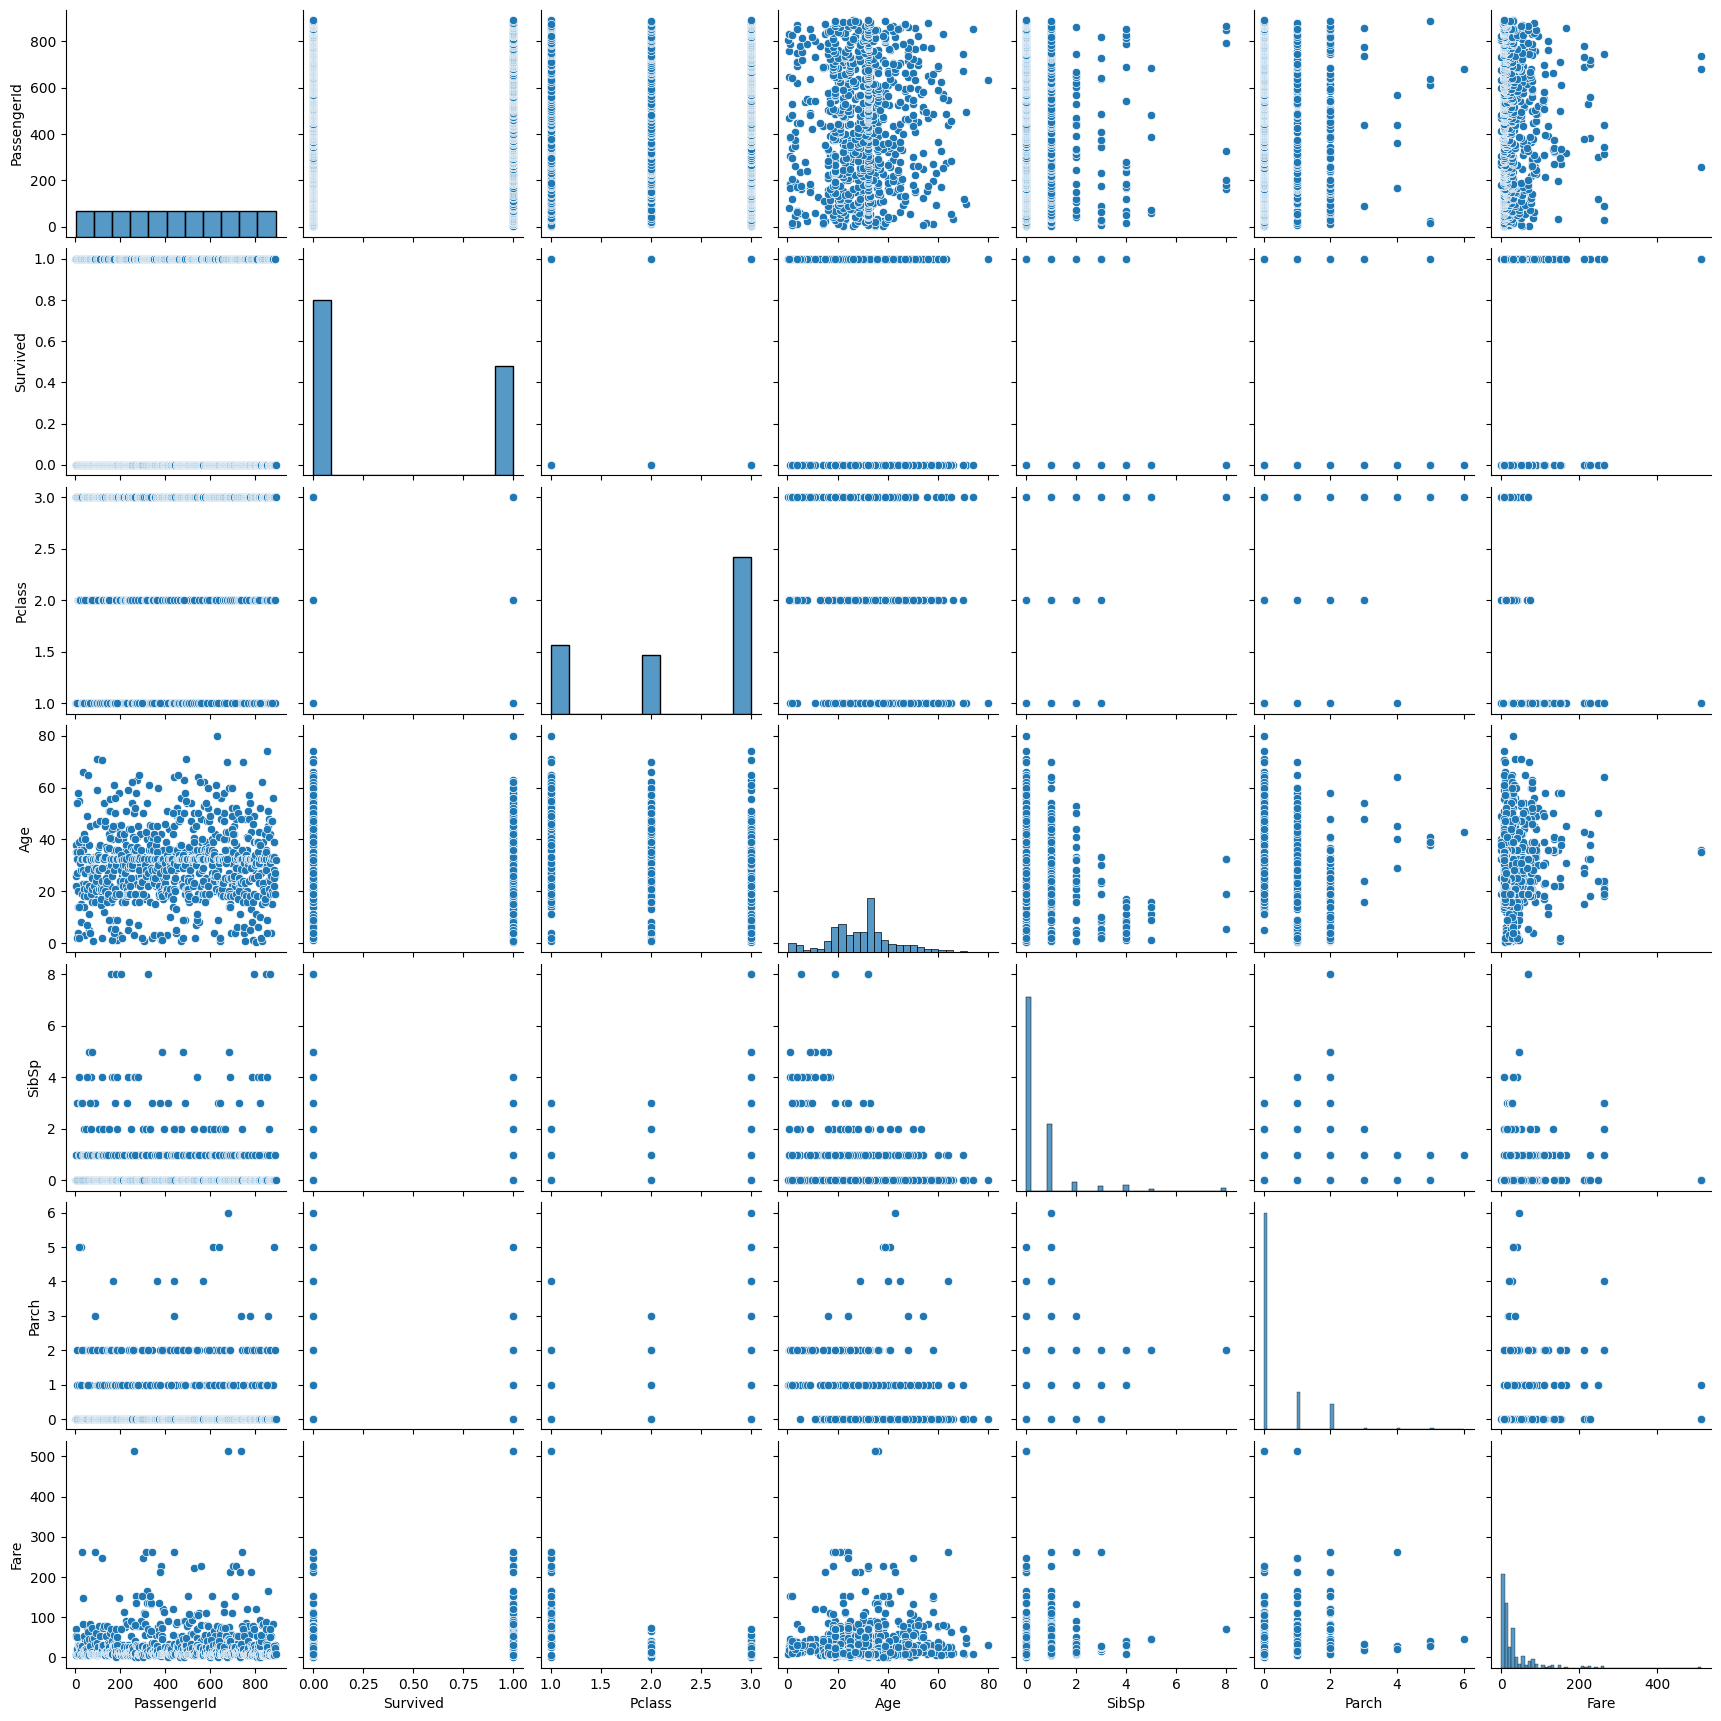

In [21]:
sns.pairplot(data=new_data)

### The PairPlot was inconclusive and didn't offer much insights.

Casting the string values of "Sex" and "Embarked" column to numerical values for usage.

In [22]:
new_data['Sex'] = new_data['Sex'].map({'male': 1, 'female':0})

In [23]:
new_data['Embarked'] = new_data['Embarked'].map({'C': 0, 'S': 1, 'Q': 2})

## Plotting a few countplots to see the relationship between the features and survival.

<Axes: xlabel='Sex', ylabel='count'>

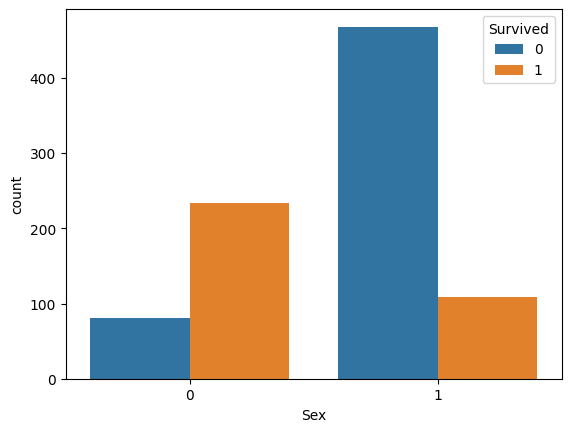

In [24]:
sns.countplot(x='Sex', hue='Survived', data=new_data)

<Axes: xlabel='Pclass', ylabel='count'>

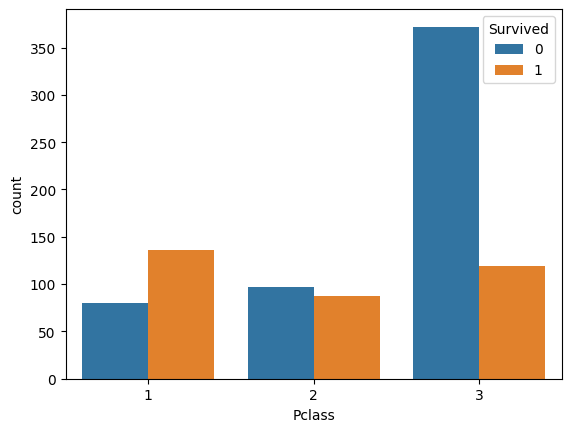

In [25]:
sns.countplot(x='Pclass', hue='Survived', data=new_data)

<Axes: xlabel='Embarked', ylabel='count'>

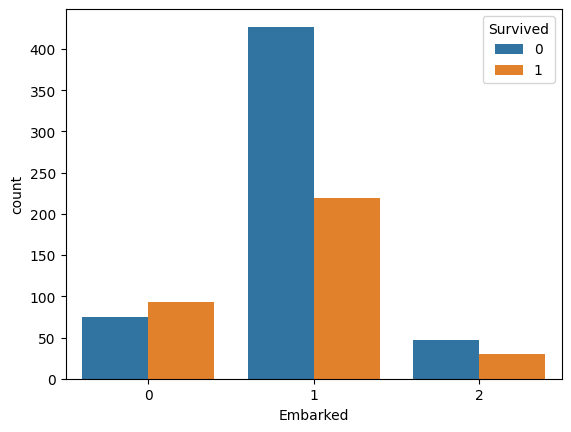

In [26]:
sns.countplot(x='Embarked', hue='Survived', data=new_data)

## Selecting revelant feature for model training.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = new_data.loc[:, ['Age', 'Sex', 'Pclass', 'Embarked']]

In [29]:
y = new_data['Survived']

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

## Selected RandomForestClassifier for the task of classification.

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [33]:
model.fit(xtrain, ytrain)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
ypred = model.predict(xtest)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Testing the model performance.

In [36]:
accuracy_score(ytest, ypred)

0.8100558659217877

In [37]:
print(confusion_matrix(ytest, ypred))

[[92 13]
 [21 53]]


In [38]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### Collecting the feature importances of this model.

In [39]:
importances = model.feature_importances_

In [40]:
features = xtrain.columns

In [41]:
feature_importances = pd.Series(importances, index=features)

<Axes: xlabel='None', ylabel='None'>

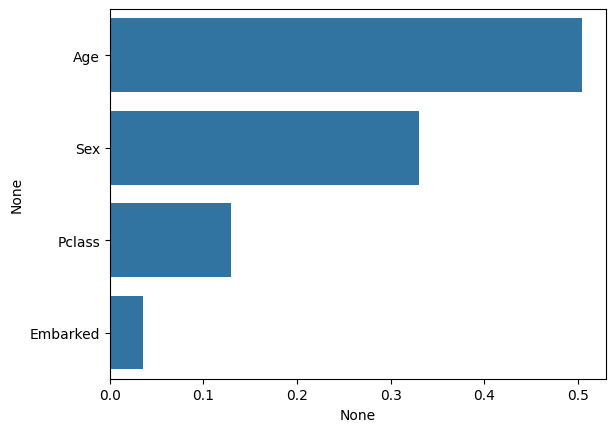

In [42]:
sns.barplot(x=feature_importances, y=feature_importances.index)

In [43]:
feature_importances

Age         0.504561
Sex         0.330672
Pclass      0.129415
Embarked    0.035351
dtype: float64

## Utilizing a GradientBoostingClassifier for better classification.

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
model_gbc = GradientBoostingClassifier(random_state=42, n_estimators=550, learning_rate=0.1)

In [46]:
model_gbc.fit(xtrain, ytrain)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,550
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [47]:
yprd = model_gbc.predict(xtest)

### Evaluating the model performance.

In [48]:
accuracy_score(ytest, yprd)

0.8324022346368715

In [49]:
print(classification_report(ytest, yprd))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



### Extracting the feature importances.

In [50]:
importances = model_gbc.feature_importances_

In [51]:
gbc_importances = pd.Series(importances, index=features)

<Axes: xlabel='None', ylabel='None'>

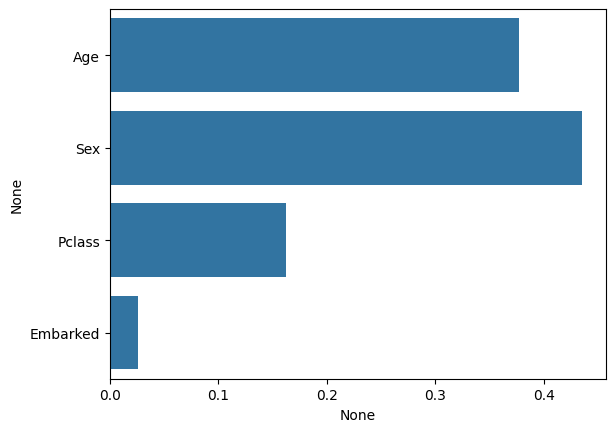

In [52]:
sns.barplot(x=gbc_importances, y=gbc_importances.index)

In [53]:
gbc_importances

Age         0.376900
Sex         0.435157
Pclass      0.161986
Embarked    0.025957
dtype: float64

# Conclusion: Age and Sex were the two most significant factors affecting the survival of a person in the Titanic incident followed by the Socio-Economic Class.

Two models were trained for the purpose of classification and finding the features with the most impact on the survival.

The RandomForestClassifier achieved an accuracy of 0.81 and ranked Age as the most important factor, followed by Sex and Socio-Economic class.

The GradientBoostingClassifier achieved a slightly higher accuracy of 0.83 and marked Sex as the most impactful feature followed by Age and Socio-Economic Class.